## Import the Libraries

In [2]:
!pip install heatmapz

In [3]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2
import random
from heatmap import heatmap, corrplot

## Add your crendentials

In [4]:
# Insert your Spotify username and the credentials that you obtained from spotify developer
cid = 
secret = 
redirect_uri='http://localhost:8910/callback'
username = 

## Fetch the user's favourite songs

In [6]:
results = sp.current_user_top_tracks(limit=50, offset=0,time_range='medium_term')
results

{'items': [{'album': {'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg'},
      'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg',
      'id': '2YZyLoL8N0Wb9xBt1NhZWg',
      'name': 'Kendrick Lamar',
      'type': 'artist',
      'uri': 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     'MC',
     'MT',
     'MX',
     'MY',
     'NI',
     'NL',
     'NO',

In [7]:
# Conver it to Dataframe
track_name = []
track_id = []
artist = []
album = []
duration = []
popularity = []
for i, items in enumerate(results['items']):
        track_name.append(items['name'])
        track_id.append(items['id'])
        artist.append(items["artists"][0]["name"])
        duration.append(items["duration_ms"])
        album.append(items["album"]["name"])
        popularity.append(items["popularity"])

# Create the final df   
df_favourite = pd.DataFrame({ "track_name": track_name, 
                             "album": album, 
                             "track_id": track_id,
                             "artist": artist, 
                             "duration": duration, 
                             "popularity": popularity})

In [8]:
df_favourite

,track_name,album,track_id,artist,duration,popularity
0,Alright,To Pimp A Butterfly,3iVcZ5G6tvkXZkZKlMpIUs,Kendrick Lamar,219333,72
1,Viol,Conspiracy Pt.2,07aqlD34P6qYrWjRNBt1eW,Gesaffelstein,343878,51
2,Blinding Lights,Blinding Lights,0sf12qNH5qcw8qpgymFOqD,The Weeknd,201573,83
3,Come On Eileen,Come On Eileen / Dubious,6nWcEzyxDozQcmxMoNJtYx,Dexys Midnight Runners,205933,69
4,"Thunderclouds (feat. Sia, Diplo, and Labrinth)","LABRINTH, SIA & DIPLO PRESENT... LSD",4lJNen4SMTIJMahALc3DcB,Sia,187026,77
5,Empire State Of Mind,The Blueprint 3,2igwFfvr1OAGX9SKDCPBwO,JAY-Z,276920,78
6,"Genius (feat. Sia, Diplo, and Labrinth)","LABRINTH, SIA & DIPLO PRESENT... LSD",4xigPf2sigSPmuFH3qCelB,Sia,213706,75
7,Paparazzi,The Fame,02XnQdf7sipaKBBHixz3Zp,Lady Gaga,208306,71
8,"The Four Seasons, Violin Concerto No. 4 in F M...",Sinkovsky Plays and Sings Vivaldi,7njAZhca4o80qQdCgyEWya,Antonio Vivaldi,117906,48
9,Close To Me,The Head On The Door (Remastered),4xiyq1iRdsxuU1BPUJ490Z,The Cure,203266,68


In [9]:
def fetch_audio_features(sp, df):
    playlist = df[['track_id','track_name']] 
    index = 0
    audio_features = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    # Create an empty list to feed in different charactieritcs of the tracks
    features_list = []
    #Create keys-values of empty lists inside nested dictionary for album
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['acousticness'],
                              features['energy'], 
                              features['tempo'],
                              features['instrumentalness'], 
                              features['loudness'],
                              features['liveness'],
                              features['duration_ms'],
                              features['key'],
                              features['valence'],
                              features['speechiness'],
                              features['mode']
                             ])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'acousticness', 'energy','tempo', 
                                                             'instrumentalness', 'loudness', 'liveness','duration_ms', 'key',
                                                             'valence', 'speechiness', 'mode'])
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_name', inplace=True, drop=True)
    return df_playlist_audio_features

In [10]:
df_fav = fetch_audio_features (sp, df_favourite)
df_fav

,track_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,mode
track_name,,,,,,,,,,,,,
Alright,3iVcZ5G6tvkXZkZKlMpIUs,0.796,0.074200,0.76600,110.034,0.000000,-5.974,0.0827,219333,7,0.5580,0.2380,1
Viol,07aqlD34P6qYrWjRNBt1eW,0.597,0.000076,0.83900,108.993,0.825000,-6.964,0.5500,343878,7,0.2020,0.0377,1
Blinding Lights,0sf12qNH5qcw8qpgymFOqD,0.513,0.001470,0.79600,171.017,0.000209,-4.075,0.0938,201573,1,0.3450,0.0629,1
Come On Eileen,6nWcEzyxDozQcmxMoNJtYx,0.410,0.197000,0.87400,107.080,0.000000,-4.286,0.0843,205933,0,0.8240,0.0907,1
"Thunderclouds (feat. Sia, Diplo, and Labrinth)",4lJNen4SMTIJMahALc3DcB,0.690,0.007700,0.71400,112.009,0.000072,-5.948,0.1910,187027,7,0.4890,0.0338,1
Empire State Of Mind,2igwFfvr1OAGX9SKDCPBwO,0.491,0.029500,0.95600,173.585,0.000000,-1.538,0.4600,276920,11,0.8110,0.3920,1
"Genius (feat. Sia, Diplo, and Labrinth)",4xigPf2sigSPmuFH3qCelB,0.603,0.079900,0.61500,158.657,0.000067,-4.931,0.1170,213707,11,0.5610,0.1650,0
Paparazzi,02XnQdf7sipaKBBHixz3Zp,0.762,0.113000,0.69200,114.906,0.000000,-3.973,0.0940,208307,5,0.3970,0.0438,0
"The Four Seasons, Violin Concerto No. 4 in F Minor, RV 297 ""Winter"": II. Largo",7njAZhca4o80qQdCgyEWya,0.330,0.898000,0.06490,83.398,0.000062,-25.176,0.0931,117907,3,0.3400,0.0443,1


## EDA

In [11]:
df_fav.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alright to Stay With Me - Live From Spotify Berlin
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          50 non-null     object 
 1   danceability      50 non-null     float64
 2   acousticness      50 non-null     float64
 3   energy            50 non-null     float64
 4   tempo             50 non-null     float64
 5   instrumentalness  50 non-null     float64
 6   loudness          50 non-null     float64
 7   liveness          50 non-null     float64
 8   duration_ms       50 non-null     int64  
 9   key               50 non-null     int64  
 10  valence           50 non-null     float64
 11  speechiness       50 non-null     float64
 12  mode              50 non-null     int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 5.5+ KB


In [12]:
df_fav.describe()

,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,mode
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,0.616880,0.328566,0.573630,124.938160,0.141869,-8.594240,0.188082,228642.400000,5.60000,0.475684,0.084274,0.520000
std,0.161902,0.347472,0.249242,30.754291,0.301191,5.752465,0.157810,102214.159358,3.60838,0.251024,0.080001,0.504672
min,0.240000,0.000022,0.007610,74.735000,0.000000,-30.566000,0.041500,80284.000000,0.00000,0.038000,0.026000,0.000000
25%,0.506000,0.057950,0.416000,102.510250,0.000000,-10.782000,0.093850,187100.250000,2.25000,0.305250,0.038700,0.000000
50%,0.645500,0.158000,0.640500,120.189000,0.000065,-6.615500,0.111000,214327.000000,6.00000,0.435500,0.050350,1.000000
75%,0.723250,0.622750,0.736500,150.009500,0.010438,-4.977000,0.224750,238816.750000,8.75000,0.679250,0.101350,1.000000
max,0.936000,0.980000,0.960000,185.075000,0.916000,-1.538000,0.708000,820853.000000,11.00000,0.965000,0.397000,1.000000


Speechinees and intrumentaleness is highly varied 

In [15]:
## Some machine learning 

from sklearn.feature_extraction.text import TfidfVectorizer

v=TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 6), max_features=10000)
X_names_sparse = v.fit_transform(track_name)
X_names_sparse.shape

(50, 506)

In [16]:
# Add my ratings, will make it automated 
df_fav['ratings']=[10, 9, 9, 10, 8, 6, 8, 4, 3, 5, 7, 5, 5, 8, 8, 7, 8, 8, 10, 8, 10, 8, 4, 4, 4, 
                   10, 10, 9, 8, 8, 4, 8, 4, 3, 5, 7, 5, 5, 8, 8, 7, 8, 8, 10, 8, 10, 8, 4, 4, 4]

### Step to find the most important feature in my playlist

In [17]:
# Analyze feature importances
from sklearn.ensemble.forest import RandomForestRegressor, RandomForestClassifier
# Can combine step above with this
X_train = df_fav.drop(['ratings','track_id'], axis=1)
y_train = df_fav['ratings']
forest = RandomForestClassifier(random_state=42, max_depth=5, max_features=11) # Set by GridSearchCV below
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))

Feature ranking:
1. danceability 0.125517 
2. acousticness 0.108673 
3. energy 0.103823 
4. tempo 0.100316 
5. instrumentalness 0.092505 
6. loudness 0.092375 
7. liveness 0.080993 
8. duration_ms 0.075862 
9. key 0.073811 
10. valence 0.065138 
11. speechiness 0.063045 
12. mode 0.017944 


/Users/mgarg/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


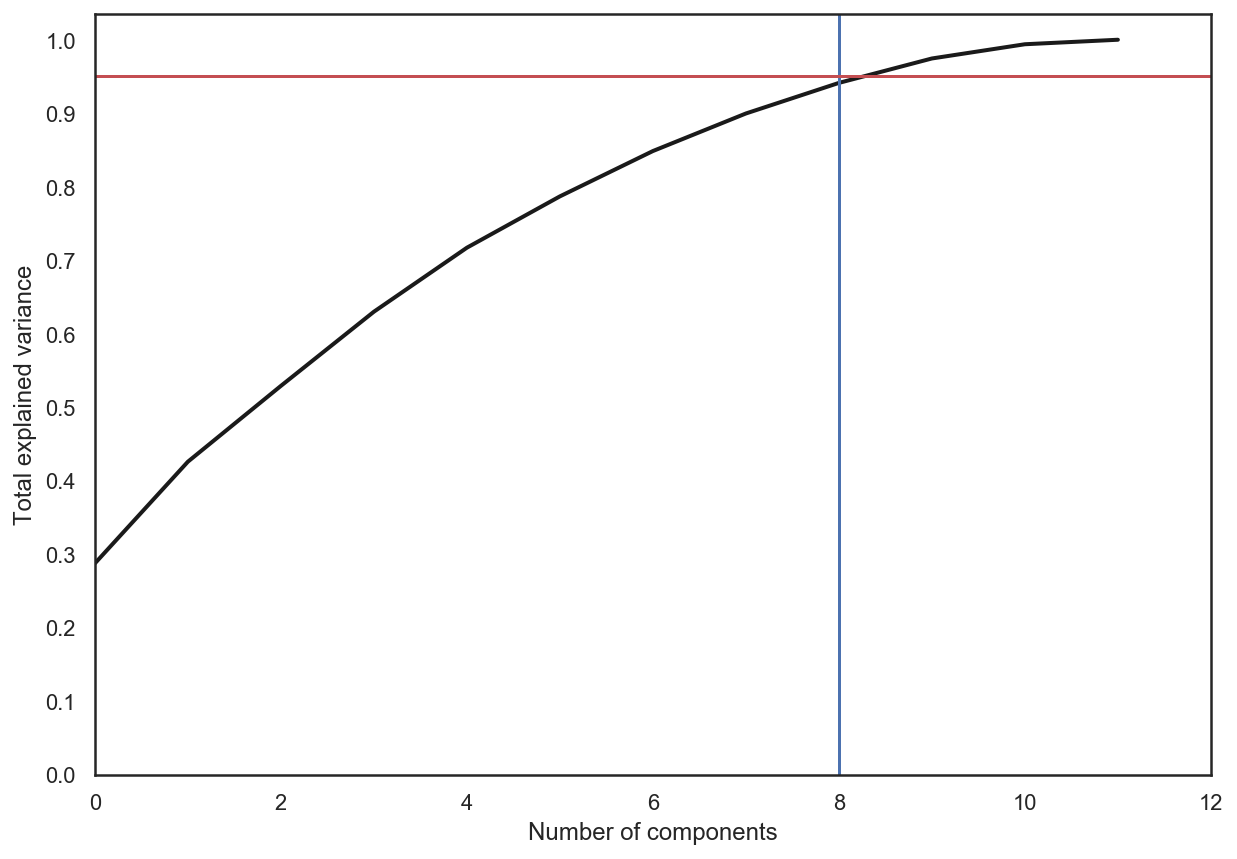

In [18]:
# Apply pca to the scaled train set first

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b') # Tune this so that you obtain at least a 95% total variance explained
plt.axhline(0.95, c='r')
plt.show();

In [73]:
# Fit your dataset to the optimal pca
pca1 = decomposition.PCA(n_components=8)
X_pca = pca1.fit_transform(X_scaled)
X_pca

array([[-1.68791664, -0.19971101,  0.36354968,  1.31789278, -0.18610854,
         0.2840921 , -1.17267604,  0.18626595],
       [ 0.17569227,  1.58917675,  1.28697751,  0.68313907,  3.21449628,
        -0.03395982,  1.22893119, -0.37290613],
       [-1.22779615,  0.0889554 ,  0.19558267, -1.34527083, -0.25123479,
        -1.37814412,  1.16729492,  0.32190952],
       [-1.1456916 , -0.71003964,  0.15868627, -0.58092508,  0.23223137,
        -1.20881735, -0.22222688,  2.19841357],
       [-0.98742036, -0.66372311,  0.34369096,  0.4240799 ,  0.58621246,
        -1.09199246, -0.10043127, -0.42096554],
       [-3.44878143,  2.90153251,  2.45143766,  1.12492084, -1.03286714,
         1.08340777, -0.51202926,  1.02217541],
       [-1.55190765,  1.25744567, -0.73278337,  0.31276525, -1.31673805,
         0.38808974, -0.26405981, -0.63677001],
       [-0.89617107, -0.53600914, -1.36374117, -0.48969998,  0.54883917,
        -0.09248754, -0.43975657, -0.69141115],
       [ 3.77558212, -1.48140129

In [72]:
# You may want to check the results of TSNE also
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X_scaled)
X_tsne

array([[ 102.07347   ,   54.68019   ],
       [ -54.149693  ,  118.05222   ],
       [  23.034561  ,  -80.83892   ],
       [  96.76069   ,  -38.653557  ],
       [  27.18242   ,   15.270242  ],
       [ 130.43964   ,  -85.4337    ],
       [  58.13154   ,  -72.802605  ],
       [   1.8590767 ,   14.7193985 ],
       [ -89.60334   ,  -47.007088  ],
       [ -22.020042  ,   87.75853   ],
       [ 138.4825    ,  -21.692087  ],
       [   7.593928  ,  -43.295433  ],
       [ -52.238964  ,   40.59294   ],
       [ -95.88499   ,   30.24443   ],
       [ -82.47007   ,   59.345894  ],
       [ -61.056305  ,  -20.651632  ],
       [  89.31808   ,  -72.53755   ],
       [ -27.82523   ,  -42.473     ],
       [  69.95845   ,   41.893806  ],
       [  22.057459  ,   74.56084   ],
       [ -84.13948   ,   -0.16054294],
       [-104.17222   ,  -68.975914  ],
       [  -4.4292226 ,  -14.0080595 ],
       [  45.92493   ,  -12.635492  ],
       [  51.113205  ,   78.03416   ],
       [  63.02866   ,  -

In [21]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse])) # Check with X_tsne + X_names_sparse also

In [22]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Initialize a stratified split for the validation process
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
# Decision Trees MOdel
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=skf, n_jobs=-1, verbose=True)

tree_grid.fit(X_train_last, y_train)
tree_grid.best_estimator_, tree_grid.best_score_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    2.3s finished


(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=9, max_features=6, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 0.38)

In [69]:
# Random Forests second

parameters = {'max_features': [4, 7, 8, 10], 'min_samples_leaf': [1, 3, 5, 8], 'max_depth': [3, 5, 8]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv1 = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv1.fit(X_train_last, y_train)
gcv1.best_estimator_, gcv1.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   16.2s finished


(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=3, max_features=4,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                        warm_start=False),
 0.34)

In [70]:
# kNN third
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': range(1, 10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid = GridSearchCV(knn, knn_params, cv=skf, n_jobs=-1, verbose=True)
knn_grid.fit(X_train_last, y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.7s finished


({'n_neighbors': 6}, 0.24)

In [24]:
# Now build your test set;
# Generate a new dataframe for recommended tracks
# Set recommendation limit as half the Playlist Length per track, you may change this as you like
# Check documentation for  recommendations; https://beta.developer.spotify.com/documentation/web-api/reference/browse/get-recommendations/

rec_tracks = []
for i in df_fav['track_id'].values.tolist():
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=int(len(df_fav)/2))['tracks'];

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    rec_track_ids.append(i['id'])
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i])
    for track in rec_audio_features:
        rec_features.append(track)
        
rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)
rec_playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0SGkqnVQo9KPytSri1H6cF,0.780,0.575,1,-5.628,0,0.1390,0.1060,0.000000,0.1290,0.273,81.502,audio_features,0SGkqnVQo9KPytSri1H6cF,spotify:track:0SGkqnVQo9KPytSri1H6cF,https://api.spotify.com/v1/tracks/0SGkqnVQo9KP...,https://api.spotify.com/v1/audio-analysis/0SGk...,222360,4
5A63MgoNPniM7necFglMhe,0.903,0.602,10,-5.429,0,0.3360,0.0134,0.000000,0.1400,0.529,99.010,audio_features,5A63MgoNPniM7necFglMhe,spotify:track:5A63MgoNPniM7necFglMhe,https://api.spotify.com/v1/tracks/5A63MgoNPniM...,https://api.spotify.com/v1/audio-analysis/5A63...,254520,4
2q0VexHJirnUPnEOhr2DxK,0.673,0.463,2,-7.247,1,0.1910,0.6810,0.000005,0.0907,0.268,147.981,audio_features,2q0VexHJirnUPnEOhr2DxK,spotify:track:2q0VexHJirnUPnEOhr2DxK,https://api.spotify.com/v1/tracks/2q0VexHJirnU...,https://api.spotify.com/v1/audio-analysis/2q0V...,277521,4
7yotKA30dwTKNEGomV9ZsI,0.831,0.782,0,-6.274,1,0.1500,0.2100,0.000000,0.1130,0.199,141.869,audio_features,7yotKA30dwTKNEGomV9ZsI,spotify:track:7yotKA30dwTKNEGomV9ZsI,https://api.spotify.com/v1/tracks/7yotKA30dwTK...,https://api.spotify.com/v1/audio-analysis/7yot...,191437,4
46CA1H0T1r7u5lDUtVveAh,0.233,0.705,5,-6.928,1,0.0928,0.0319,0.000065,0.1850,0.352,74.102,audio_features,46CA1H0T1r7u5lDUtVveAh,spotify:track:46CA1H0T1r7u5lDUtVveAh,https://api.spotify.com/v1/tracks/46CA1H0T1r7u...,https://api.spotify.com/v1/audio-analysis/46CA...,401573,4


In [28]:
X_test_names = v.transform(rec_track_names)

In [26]:
rec_playlist_df=rec_playlist_df[["acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]

In [29]:
# Make predictions
tree_grid.best_estimator_.fit(X_train_last, y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
rec_playlist_df_pca = pca1.transform(rec_playlist_df_scaled)
X_test_last = csr_matrix(hstack([rec_playlist_df_pca, X_test_names]))
y_pred_class = tree_grid.best_estimator_.predict(X_test_last)

In [38]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings', ascending = False)
rec_playlist_df = rec_playlist_df.reset_index()

# Pick the top ranking tracks to add your new playlist 9, 10 will work
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=9]['index'].values.tolist()

In [59]:
# No ratings of 9 or 10 this case try adding 8's only
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']==5]['index'].values.tolist()

In [60]:
# Check what is about to happen :)
len(rec_tracks), rec_playlist_df.shape, len(recs_to_add)

(1250, (1250, 15), 110)

In [58]:
rec_playlist_df

,level_0,index,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
0,489,5o4yGlG0PfeVUa6ClIyOxq,0.06460,0.867,162586,0.545,0.000289,2,0.0505,-5.192,1,0.0625,139.943,0.525,10
1,673,4cS2HQ6jK80vqdY9ofpztx,0.28900,0.865,188867,0.690,0.013800,7,0.2250,-7.448,1,0.0444,121.983,0.868,10
2,1134,2smpiAZfaN0GFi15MqAq6E,0.33700,0.723,185400,0.829,0.000035,11,0.0931,-7.123,0,0.0453,106.023,0.582,10
3,746,22L7bfCiAkJo5xGSQgmiIO,0.07960,0.541,299613,0.803,0.000017,1,0.1760,-3.284,1,0.0738,142.135,0.221,10
4,263,6wgueesHOGU3UIkckVISHZ,0.07460,0.645,175200,0.861,0.000009,2,0.1090,-9.929,1,0.0319,120.139,0.734,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,860,3Kvce9qtIAmR4Axtq7mdGl,0.14000,0.692,146998,0.758,0.031400,5,0.0928,-4.826,1,0.2170,84.420,0.241,5
1246,202,1e1JKLEDKP7hEQzJfNAgPl,0.01130,0.791,181812,0.581,0.000000,11,0.3500,-7.323,0,0.2860,162.990,0.438,4
1247,987,6ALPLbDJ9eWVij9ep3Cgf4,0.00364,0.319,174507,0.836,0.000018,11,0.1000,-6.706,1,0.1130,180.560,0.940,4
1248,983,5NQJnRpJHRaupdegphntQT,0.01320,0.684,222187,0.710,0.000000,11,0.4440,-3.614,0,0.0779,93.007,0.451,4


In [61]:
rec_array = np.reshape(recs_to_add, (5, 22))

In [66]:
sp.user_playlist_create(username, 'DJ python', description = 'Test playlist created using python!')

{'collaborative': False,
 'description': 'Test playlist created using python!',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/68f2pzH9P5Q2x75GVk3wK3'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/68f2pzH9P5Q2x75GVk3wK3',
 'id': '68f2pzH9P5Q2x75GVk3wK3',
 'images': [],
 'name': 'DJ python',
 'owner': {'display_name': 'Manik Garg',
  'external_urls': {'spotify': 'https://open.spotify.com/user/214zfwnr2vvgsofpfv2bp4xua'},
  'href': 'https://api.spotify.com/v1/users/214zfwnr2vvgsofpfv2bp4xua',
  'id': '214zfwnr2vvgsofpfv2bp4xua',
  'type': 'user',
  'uri': 'spotify:user:214zfwnr2vvgsofpfv2bp4xua'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'MSw2ZjQ1OTMyM2EzMzhmN2Y4ODJlNDU1NDE0YmU4MGZmNTdkYjMwZWY3',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/68f2pzH9P5Q2x75GVk3wK3/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri': '

In [62]:
# Create a new playlist for tracks to add - you may also add these tracks to your source playlist and proceed
playlist_recs = sp.user_playlist_create(username, 
                                        name= 'Manik Pandas')

In [64]:
# Add tracks to the new playlist
for i in rec_array:
           sp.user_playlist_add_tracks(username, playlist_recs['id'], i)